In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import requests
import time
import seaborn as sns
from scipy.stats import linregress
import plotly.express as px


In [2]:
# Study data files"
Ma_Crime = "Ma_crime_by_year.csv"


#Read the data
crime_data= pd.read_csv(Ma_Crime)
crime_data



/var/folders/l0/wm_67kcd74bgs_0_3k_rgsn40000gn/T/ipykernel_56805/3496189929.py:6: DtypeWarning: Columns (1,7,13) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_data= pd.read_csv(Ma_Crime)


,_id,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,2603,I182002786,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B2,909,Y,1/11/18 13:46,2018,1,Thursday,13,Part One,WHITTIER ST,42.333802,-71.088809,"(42.33380238, -71.08880867)"
1,2611,I182002801,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B2,259,Y,1/11/18 14:03,2018,1,Thursday,14,Part One,NaN,42.305451,-71.080572,"(42.30545103, -71.08057209)"
2,2612,I182002801,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B2,259,Y,1/11/18 14:03,2018,1,Thursday,14,Part One,NaN,42.305451,-71.080572,"(42.30545103, -71.08057209)"
3,3338,I182003512,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",D4,,Y,1/13/18 21:34,2018,1,Saturday,21,Part One,BOYLSTON ST,NaN,NaN,NaN
4,3340,I182003512,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",D4,,Y,1/13/18 21:34,2018,1,Saturday,21,Part One,BOYLSTON ST,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224537,401947,222100247,3803,Motor Vehicle Accident,M/V ACCIDENT - PERSONAL INJURY,D4,,0,12/28/22 18:08,2022,12,Wednesday,18,NaN,TREMONT ST & APPLETON ST\nBOSTON MA 02116\nUN...,42.346539,-71.069114,"(42.346539016466174, -71.06911401009671)"
224538,402051,222100383,3803,Motor Vehicle Accident,M/V ACCIDENT - PERSONAL INJURY,B2,309,0,12/29/22 12:15,2022,12,Thursday,12,NaN,WARREN STREET,NaN,NaN,NaN
224539,402292,220601970,3803,Motor Vehicle Accident,M/V ACCIDENT - PERSONAL INJURY,B3,426,0,12/30/22 18:12,2022,12,Friday,18,NaN,FREMONT ST & BABSON ST\nBOSTON MA 02126\nUNIT...,42.271200,-71.092390,"(42.27120003650123, -71.09239000036666)"
224540,402323,222100809,3803,Motor Vehicle Accident,M/V ACCIDENT - PERSONAL INJURY,B3,477,0,12/30/22 21:27,2022,12,Friday,21,NaN,HARVARD ST,42.276087,-71.108341,"(42.27608689065455, -71.10834131020634)"


In [3]:
# group the crime data by Year/offence code group-name for years 2018-2022

year_crime = crime_data.groupby(["YEAR", "OFFENSE_CODE_GROUP"]).size().reset_index(name='CRIME_COUNT')
year_crime



,YEAR,OFFENSE_CODE_GROUP,CRIME_COUNT
0,2018,Aggravated Assault,2485
1,2018,Aircraft,18
2,2018,Arson,18
3,2018,Assembly or Gathering Violations,199
4,2018,Auto Theft Recovery,347
...,...,...,...
174,2022,Robery,212
175,2022,Theft,1619
176,2022,Trespassing,320
177,2022,Vandalism,2970


In [4]:
#top SORTING DESCENDING ORDER crime
Top_crime_df=year_crime.sort_values(['CRIME_COUNT'],ascending=False)
Top_crime_df

,YEAR,OFFENSE_CODE_GROUP,CRIME_COUNT
38,2018,Motor Vehicle Accident Response,10147
34,2018,Medical Assistance,8257
29,2018,Larceny,8116
89,2019,Larceny,7811
119,2020,Larceny,6250
...,...,...,...
22,2018,HUMAN TRAFFICKING,1
139,2021,Fire,1
169,2022,Manslaughter,1
155,2021,conspircy drug,1


In [5]:
# Top_2018_crime= Top_crime_df.loc[(Top_crime_df["YEAR"] == 2018)].head(10)
# Top_2019_crime= Top_crime_df.loc[(Top_crime_df["YEAR"] == 2019)].head(10)
# Top_2020_crime= Top_crime_df.loc[(Top_crime_df["YEAR"] == 2020)].head(10)
# Top_2021_crime= Top_crime_df.loc[(Top_crime_df["YEAR"] == 2021)].head(10)
# Top_2022_crime= Top_crime_df.loc[(Top_crime_df["YEAR"] == 2022)].head(10)



In [6]:
#Top 10 crime by offece per year 2018-2022
Top_10_crime_years = pd.concat([Top_crime_df.loc[Top_crime_df["YEAR"] == year]\
                             .head(10) for year in [2018, 2019, 2020, 2021, 2022]])
Top_10_crime_years

,YEAR,OFFENSE_CODE_GROUP,CRIME_COUNT
38,2018,Motor Vehicle Accident Response,10147
34,2018,Medical Assistance,8257
29,2018,Larceny,8116
41,2018,Other,5600
26,2018,Investigate Person,5467
55,2018,Simple Assault,5262
13,2018,Drug Violation,4777
59,2018,Verbal Disputes,4423
58,2018,Vandalism,4252
27,2018,Investigate Property,3756


In [7]:
# Top_2018_crime= Top_crime_df.loc[(Top_crime_df["YEAR"] == 2018)].head(1)
# Top_2019_crime= Top_crime_df.loc[(Top_crime_df["YEAR"] == 2019)].head(1)
# Top_2020_crime= Top_crime_df.loc[(Top_crime_df["YEAR"] == 2020)].head(1)
# Top_2021_crime= Top_crime_df.loc[(Top_crime_df["YEAR"] == 2021)].head(1)
# Top_2022_crime= Top_crime_df.loc[(Top_crime_df["YEAR"] == 2022)].head(1)

Top_crime_years = pd.concat([Top_crime_df.loc[Top_crime_df["YEAR"] == year]\
                             .head(1) for year in [2018, 2019, 2020, 2021, 2022]])
Top_crime_years

,YEAR,OFFENSE_CODE_GROUP,CRIME_COUNT
38,2018,Motor Vehicle Accident Response,10147
89,2019,Larceny,7811
119,2020,Larceny,6250
143,2021,Larceny,6006
161,2022,Drug Other Narcotic,6165


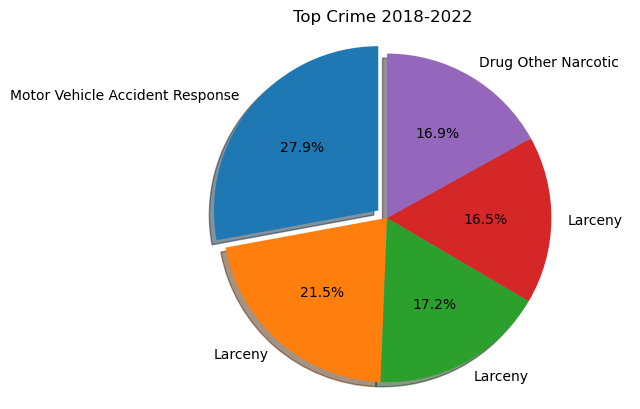

In [8]:
#Top crime  between 2018 and 2022 pie chart pyplot
y=Top_crime_years['CRIME_COUNT']
labels=Top_crime_years['OFFENSE_CODE_GROUP']
explode=(0.07,0,0,0,0)


plt.title("Top Crime 2018-2022")
plt.pie(y, explode=explode, labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.savefig('pie_chart.jpeg')
plt.show()

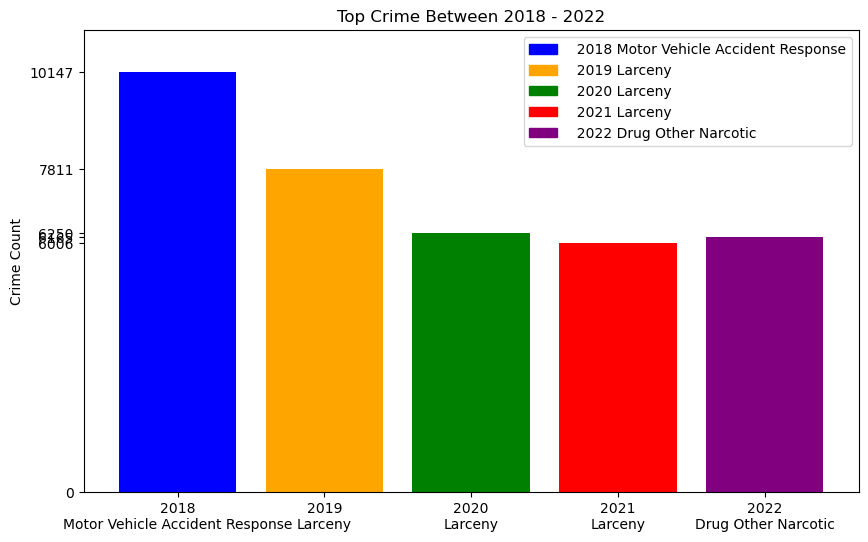

In [9]:
#Bar chart for top crime per year

# Define the data
Top_crime_years = {
    'YEAR': [2018, 2019, 2020, 2021, 2022],
    'CRIME_COUNT': [10147, 7811, 6250, 6006, 6165],
    'OFFENSE_CODE_GROUP': ['Motor Vehicle Accident Response', 'Larceny', 'Larceny', 'Larceny', 'Drug Other Narcotic']
}

# Define color mapping
year_color_mapping = {
    2018: 'blue',
    2019: 'orange',
    2020: 'green',
    2021: 'red',
    2022: 'purple'
}
offence_color_mapping = {
    '2018 Motor Vehicle Accident Response': 'blue',
    '2019 Larceny': 'orange',
   '2020 Larceny': 'green',
    '2021 Larceny': 'red',
   '2022 Drug Other Narcotic': 'purple'
}

# Create DataFrame
Top_crime = pd.DataFrame(Top_crime_years)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Assigning colors based on the year
colors = [year_color_mapping[year] for year in Top_crime_years['YEAR']]

# Bar plot with custom colors
OFFENSE = ax.bar(Top_crime.index, Top_crime['CRIME_COUNT'], color=colors)

# Set title, xlabel, and ylabel
ax.set_title("Top Crime Between 2018 - 2022")
ax.set_ylabel("Crime Count")

# Combine Year and CRIME for x-axis ticks
xticklabels = [f"{year}\n{OFFENSE_CODE_GROUP}" for year, OFFENSE_CODE_GROUP in zip(Top_crime["YEAR"], Top_crime["OFFENSE_CODE_GROUP"])]

# Set x-axis ticks and labels
ax.set_xticks(Top_crime.index)
ax.set_xticklabels(xticklabels, rotation=0, rotation_mode="anchor", ha="center", wrap=True)

# Set y-axis ticks and limits
y_ticks = [0, 10147, 7811,6250, 6006, 6165]
ax.set_yticks(y_ticks)
ax.set_ylim(0, max(Top_crime['CRIME_COUNT']) * 1.1)

# Create custom legend patches

legend_patches = [mpatches.Patch(color=color, label=f'  {year}') for year, color in offence_color_mapping.items()]

# Display legend
plt.legend(handles=legend_patches)

# Save Chart
plt.savefig('bar_Crime_2018-22.jpeg')

plt.show()

In [10]:
# Read Massachusets Gross Sale 
Ma_CannabisGS = "MA_Gross_Sales_2018_2024.csv"


#Read the data
Ma_CannabisGS= pd.read_csv(Ma_CannabisGS)
Ma_CannabisGS

,SaleDate,Year,PRODUCT_CATEGORY,UNIT_OF_MEASURE,RecordNo,TOTAL_$,CountBasedTotal,DollarCountBasedTotal,WeightBasedTotal,DollarWeightBasedTotal,Quantity,CCCLastUpdated
0,11/5/18,2018,Infused (edible),Each,1,60.00,2,60.00,0.00,0.00,2.00,3/22/24
1,11/6/18,2018,Infused (edible),Each,2,57.00,2,57.00,0.00,0.00,2.00,3/22/24
2,11/19/18,2018,Buds,Grams,3,0.00,0,0.00,0.00,0.00,0.00,3/22/24
3,11/19/18,2018,Concentrate (Each),Each,3,0.00,0,0.00,0.00,0.00,0.00,3/22/24
4,11/20/18,2018,Concentrate (Each),Each,5,163585.03,3031,163585.03,0.00,0.00,3031.00,3/22/24
...,...,...,...,...,...,...,...,...,...,...,...,...
26123,3/17/24,2024,Concentrate,Grams,26109,24412.09,0,0.00,870.07,24412.09,870.07,3/22/24
26124,3/17/24,2024,Infused (non-edible),Each,26109,19051.83,568,19051.83,0.00,0.00,568.00,3/22/24
26125,3/17/24,2024,Kief,Milligrams,26109,70.05,0,0.00,3000.00,70.05,3000.00,3/22/24
26126,3/17/24,2024,Shake/Trim,Grams,26109,29098.42,0,0.00,9006.00,29098.42,9006.00,3/22/24


In [11]:
# Group by 'Year' and 'PRODUCT_CATEGORY',and sum the 'TOTAL_$' for each group
Product_sale_Per_year = Ma_CannabisGS.groupby(["Year", "PRODUCT_CATEGORY"])['TOTAL_$'].sum().reset_index()
Product_sale_Per_year


,Year,PRODUCT_CATEGORY,TOTAL_$
0,2018,Buds,6814634.23
1,2018,Concentrate,487189.56
2,2018,Concentrate (Each),5412902.94
3,2018,Infused (edible),1930653.46
4,2018,Infused (non-edible),450784.47
...,...,...,...
97,2024,Seeds,16831.01
98,2024,Shake/Trim,2649958.92
99,2024,Shake/Trim (by strain),6702187.59
100,2024,Suppository,3630.21


In [12]:
Top_Prod_df=Product_sale_Per_year.sort_values(['TOTAL_$'],ascending=False)
Top_Prod_df

,Year,PRODUCT_CATEGORY,TOTAL_$
66,2023,Buds,6.299092e+08
49,2022,Buds,5.846774e+08
32,2021,Buds,5.668532e+08
19,2020,Buds,3.322671e+08
64,2022,Vape Product,3.151187e+08
...,...,...,...
39,2021,Infused Beverages (Bulk),4.520000e+02
75,2023,Infused Liquid (Bulk),1.628300e+02
48,2021,Waste,7.500000e+01
31,2020,Waste,-5.000000e+01


In [13]:
# Top_2018_Prod_Category= Top_Prod_df.loc[(Top_Prod_df["Year"] == 2018)].head(10)
# Top_2019_Prod_Category= Top_Prod_df.loc[(Top_Prod_df["Year"] == 2019)].head(10)
# Top_2020_Prod_Category= Top_Prod_df.loc[(Top_Prod_df["Year"] == 2020)].head(10)
# Top_2021_Prod_Category= Top_Prod_df.loc[(Top_Prod_df["Year"] == 2021)].head(10)
# Top_2022_Prod_Category= Top_Prod_df.loc[(Top_Prod_df["Year"] == 2022)].head(10)
# Top_2023_Prod_Category= Top_Prod_df.loc[(Top_Prod_df["Year"] == 2023)].head(10)
# Top_2024_Prod_Category= Top_Prod_df.loc[(Top_Prod_df["Year"] == 2024)].head(10)
# Top_2018_Prod_Category
Top_ProdCategory_years = pd.concat([Top_Prod_df.loc[Top_Prod_df["Year"] == year]\
                             .head(10) for year in [2018, 2019, 2020, 2021, 2022,2023,2024]])



Top_ProdCategory_years

,Year,PRODUCT_CATEGORY,TOTAL_$
0,2018,Buds,6814634.23
2,2018,Concentrate (Each),5412902.94
3,2018,Infused (edible),1930653.46
1,2018,Concentrate,487189.56
4,2018,Infused (non-edible),450784.47
...,...,...,...
94,2024,Infused Pre-Rolls,7079375.17
99,2024,Shake/Trim (by strain),6702187.59
98,2024,Shake/Trim,2649958.92
85,2024,Concentrate,2306352.38


In [14]:
# Prod_Category = pd.DataFrame(Top_ProdCategory_years[Top_ProdCategory_years["Year"].groupby("Year")["TOTAL_$"].sum()])
# Prod_Category = pd.DataFrame(Top_ProdCategory_years.groupby("Year","PRODUCT_CATEGORY")["TOTAL_$"].sum())
# Prod_Category

# Top_ProdCategory_years = pd.concat([Top_Prod_df.loc[Top_Prod_df["PRODUCT_CATEGORY"] == year] for year in [2018, 2019, 2020, 2021, 2022,2023,2024]])
# Top_ProdCategory_years

# Grouping by 'PRODUCT_CATEGORY' and summing the 'TOTAL_$' values for each category
Top_ProdCategory_years = Top_Prod_df.groupby('PRODUCT_CATEGORY')['TOTAL_$'].sum()

# Resetting the index to make 'PRODUCT_CATEGORY' a regular column
Top_ProdCategory_years = Top_ProdCategory_years.reset_index()

# Displaying the dataframe with total sales per product category
Top_ProdCategory_years


,PRODUCT_CATEGORY,TOTAL_$
0,Buds,2.476316e+09
1,Concentrate,3.003784e+07
2,Concentrate (Bulk),6.716605e+05
3,Concentrate (Each),4.178098e+08
4,Fresh Frozen Flower,3.658264e+04
5,Immature Plants,3.831259e+05
6,Infused (edible),8.241795e+08
7,Infused (non-edible),3.433024e+07
8,Infused Beverage,4.242910e+07
9,Infused Beverages (Bulk),4.520000e+02


<Axes: title={'center': 'Cannabis Sales By Category'}>

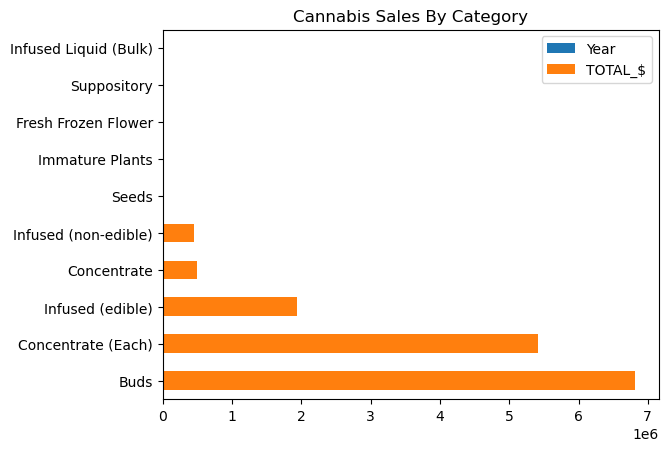

In [15]:

  
# Create a sample dataframe 
category_df = pd.DataFrame({'Year': [2018, 2018, 2018, 2018, 2018, 2024, 2024, 2024, 2024, 2024], 
                   'TOTAL_$': [6814634.23, 5412902.94, 1930653.46, 487189.56, 450784.47, 16831.01, 16367.98, 12491.06, 3630.21, 595.04]}, 
                  index=['Buds', 'Concentrate (Each)', 'Infused (edible)', 'Concentrate', 'Infused (non-edible)',
                         'Seeds', 'Immature Plants', 'Fresh Frozen Flower', 'Suppository', 'Infused Liquid (Bulk)']) 
  

# plot
category_df.plot.barh(stacked=True, 
                     title="Cannabis Sales By Category") 

In [16]:
# Read Massachusetspopulation by county
Ma_County_Population = 'Population_by_county.csv'



#Read the data
County_Population= pd.read_csv(Ma_County_Population)
County_Population

,County,Population,Year,Growth
0,Middlesex,"1,609,000",2018,0.00%
1,Middlesex,"1,611,000",2019,0.12%
2,Middlesex,"1,609,000",2020,-0.12%
3,Middlesex,"1,615,000",2021,0.37%
4,Middlesex,"1,617,000",2022,0.12%
5,Middlesex,"1,600,000",2023,-1.05%
6,Worcester,"828,600",2018,0.00%
7,Worcester,"829,300",2019,0.08%
8,Worcester,"859,700",2020,3.67%
9,Worcester,"862,200",2021,0.29%


In [38]:
# ct = pd.DataFrame(County_Population)
# Middlesex = ct[County_Population['County'] == 'Middlesex']

# Middlesex.head

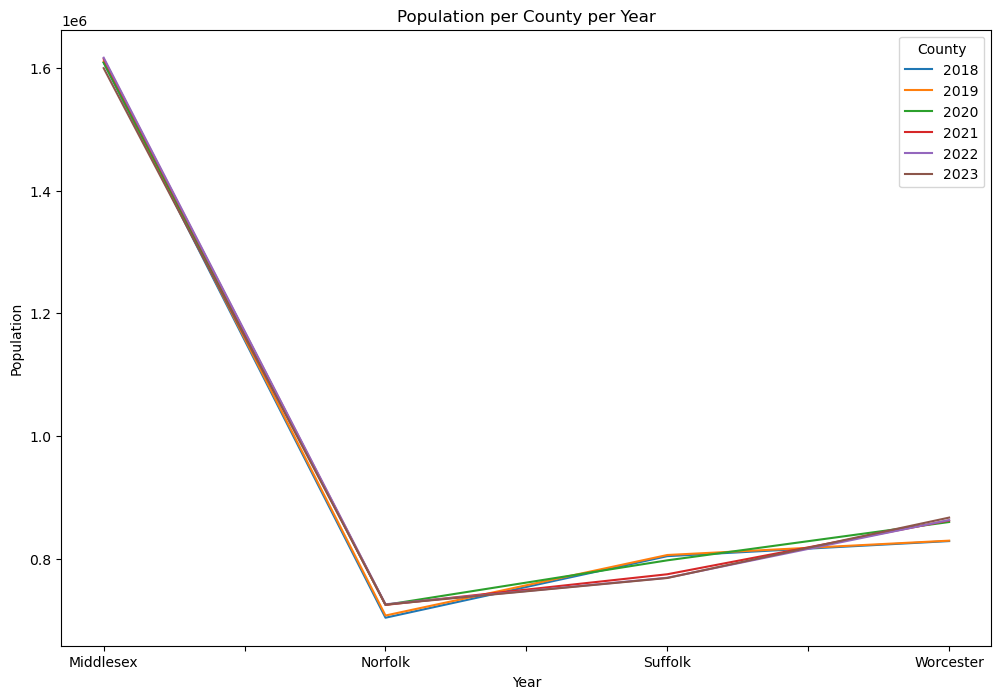

In [44]:
countyPop = {
    'County': ['Middlesex', 'Middlesex', 'Middlesex', 'Middlesex', 'Middlesex', 'Middlesex', 'Worcester', 'Worcester', 'Worcester', 'Worcester', 'Worcester', 'Worcester', 'Suffolk', 'Suffolk', 'Suffolk', 'Suffolk', 'Suffolk', 'Suffolk', 'Norfolk', 'Norfolk', 'Norfolk', 'Norfolk', 'Norfolk', 'Norfolk'],
    'Population': ['1,609,000', '1,611,000', '1,609,000', '1,615,000', '1,617,000', '1,600,000', '828,600', '829,300', '859,700', '862,200', '862,900', '866,900', '804,000', '805,900', '797,200', '774,500', '768,800', '768,400', '703,600', '707,200', '724,600', '724,500', '725,500', '725,000'],
    'Year': [2018, 2019, 2020, 2021, 2022, 2023, 2018, 2019, 2020, 2021, 2022, 2023, 2018, 2019, 2020, 2021, 2022, 2023, 2018, 2019, 2020, 2021, 2022, 2023],
#     'Growth': ['0.00%', '0.12%', '-0.12%', '0.37%', '0.12%', '-1.05%', '0.00%', '0.08%', '3.67%', '0.29%', '0.08%', '0.46%', '0.00%', '0.24%', '-1.08%', '-2.85%', '-0.74%', '-0.05%', '0.00%', '0.51%', '2.46%', '-0.01%', '0.14%', '-0.07%']
}

# Convert population to numeric
countyPop['Population'] = [int(pop.replace(',', '')) for pop in countyPop['Population']]

# Create DataFrame
df = pd.DataFrame(countyPop)

# Grouping by 'County' and 'Year' and summing the 'Population' values
# grouped_df = df.groupby(['County', 'Year'])['Population'].sum().unstack()

# Plotting the bar chart
grouped_df.plot(kind='line', figsize=(12, 8))

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population per County per Year')

# Display the plot
plt.legend(title='County')
plt.show()

In [50]:
import pandas as pd
import plotly.express as px

countyPop = {
    'County': ['Middlesex', 'Middlesex', 'Middlesex', 'Middlesex', 'Middlesex', 'Middlesex', 
               'Worcester', 'Worcester', 'Worcester', 'Worcester', 'Worcester', 'Worcester', 
               'Suffolk', 'Suffolk', 'Suffolk', 'Suffolk', 'Suffolk', 'Suffolk', 
               'Norfolk', 'Norfolk', 'Norfolk', 'Norfolk', 'Norfolk', 'Norfolk'],
    'Population': ['1,609,000', '1,611,000', '1,609,000', '1,615,000', '1,617,000', '1,600,000', 
                   '828,600', '829,300', '859,700', '862,200', '862,900', '866,900', 
                   '804,000', '805,900', '797,200', '774,500', '768,800', '768,400', 
                   '703,600', '707,200', '724,600', '724,500', '725,500', '725,000'],
    'Year': [2018, 2019, 2020, 2021, 2022, 2023, 2018, 2019, 2020, 2021, 2022, 2023, 
             2018, 2019, 2020, 2021, 2022, 2023, 2018, 2019, 2020, 2021, 2022, 2023]
}

# Convert population to numeric
countyPop['Population'] = [int(pop.replace(',', '')) for pop in countyPop['Population']]

# Create DataFrame
df = pd.DataFrame(countyPop)

# Plotting the multi-series line chart with plotly
fig = px.line(df, x='Year', y='Population', color='County', title='Population per County per Year')

# Set labels
fig.update_layout(xaxis_title='Year', yaxis_title='Population')

# Show the plot
fig.show()

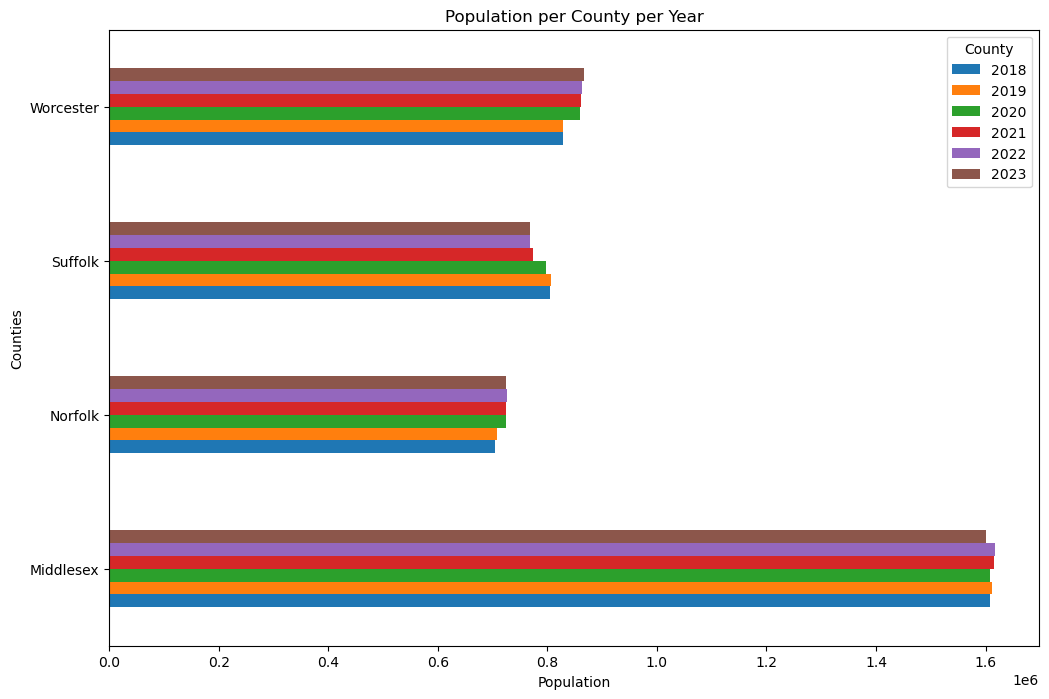

In [19]:
countyPop = {
    'County': ['Middlesex', 'Middlesex', 'Middlesex', 'Middlesex', 'Middlesex', 'Middlesex', 'Worcester', 'Worcester', 'Worcester', 'Worcester', 'Worcester', 'Worcester', 'Suffolk', 'Suffolk', 'Suffolk', 'Suffolk', 'Suffolk', 'Suffolk', 'Norfolk', 'Norfolk', 'Norfolk', 'Norfolk', 'Norfolk', 'Norfolk'],
    'Population': ['1,609,000', '1,611,000', '1,609,000', '1,615,000', '1,617,000', '1,600,000', '828,600', '829,300', '859,700', '862,200', '862,900', '866,900', '804,000', '805,900', '797,200', '774,500', '768,800', '768,400', '703,600', '707,200', '724,600', '724,500', '725,500', '725,000'],
    'Year': [2018, 2019, 2020, 2021, 2022, 2023, 2018, 2019, 2020, 2021, 2022, 2023, 2018, 2019, 2020, 2021, 2022, 2023, 2018, 2019, 2020, 2021, 2022, 2023],
#     'Growth': ['0.00%', '0.12%', '-0.12%', '0.37%', '0.12%', '-1.05%', '0.00%', '0.08%', '3.67%', '0.29%', '0.08%', '0.46%', '0.00%', '0.24%', '-1.08%', '-2.85%', '-0.74%', '-0.05%', '0.00%', '0.51%', '2.46%', '-0.01%', '0.14%', '-0.07%']
}

# Convert population to numeric
countyPop['Population'] = [int(pop.replace(',', '')) for pop in countyPop['Population']]

# Create DataFrame
df = pd.DataFrame(countyPop)

# Grouping by 'County' and 'Year' and summing the 'Population' values
grouped_df = df.groupby(['County', 'Year'])['Population'].sum().unstack()

# Plotting the bar chart
grouped_df.plot(kind='barh', figsize=(12, 8))

# Adding labels and title
plt.xlabel('Population')
plt.ylabel('Counties')
plt.title('Population per County per Year')

# Display the plot
plt.legend(title='County')
plt.show()

In [23]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Years")
    plt.ylabel('Streams')
    print(f"The r-value is: {rvalue**2}")
    
    plt.savefig('regress_Stream_Pre_Post.jpeg')
    
    plt.show()

In [21]:
## Correlation between county population and Cannabis Dispensaries